In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import os
os.environ['PATH_TO_ENV'] = "~/projects/chatsky-llm-autoconfig/.env"

In [3]:
from settings import EnvSettings
env_settings = EnvSettings()
env_settings.GENERATION_MODEL_NAME

'o3-mini'

In [4]:
import json
from dialogue2graph.pipelines.core.dialogue import Dialogue
from dialogue2graph.pipelines.core.graph import Graph
from dialogue2graph.metrics.no_llm_metrics.metrics import is_same_structure, triplet_match_accuracy

/home/olshevskaya/miniconda3/envs/conda_env_py311/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "validate" in "Dialogue" shadows an attribute in parent "BaseModel"
  warnings.warn(


In [5]:
from three_stages_1 import ThreeStagesGraphGenerator as Generator
from three_stages_1i import ThreeStagesGraphGenerator as GeneratorI
from three_stages_0i import ThreeStagesGraphGenerator as GeneratorI0
from append_chain import AppendChain

graph_generator = Generator("o3-mini") # To generate 1st graph from one dialogue
graph_generator_llm_emb = GeneratorI() # To add dialogue to existing graph: adding nodes with LLM and edges with embedder
graph_generator_llm = GeneratorI0() # To add dialogue to existing graph with LLM
graph_generator_llm_2 = AppendChain() # To add (append) dialogue to existing graph with LLM (the second approach)

## functions

In [6]:
def validate_graph(graph):
    edges_match_nodes = graph.edges_match_nodes()

    new_graph = graph.remove_duplicated_nodes()
    if new_graph is None:
        check_duplicated_nodes = False
    else:
        if new_graph.graph_dict == graph.graph_dict:
            check_duplicated_nodes = True
        else:
            check_duplicated_nodes = False
    
    if edges_match_nodes and check_duplicated_nodes:
        return True
    else:
        return False

In [8]:
def get_start_data(dataset, graph_id):
    for data in dataset:
        if data['graph_id'] == graph_id:
            example = data
            break
    true_graph = Graph(graph_dict=example['graph'])
    validate_graph(true_graph)
    true_graph.visualise_short('true_graph')

    dialogues = example['dialogues']
    
    example['incremental'] = {}
    for i in range(len(dialogues)):
        example['incremental'].setdefault(f'graph_{i}')
    
    return example, true_graph, dialogues

In [9]:
path = '../data/generated_24_with_ids.json'
with open(path, 'r', encoding="utf-8") as f:
    generated_24 = json.load(f)

## o3-mini, ThreeStagesGenerator


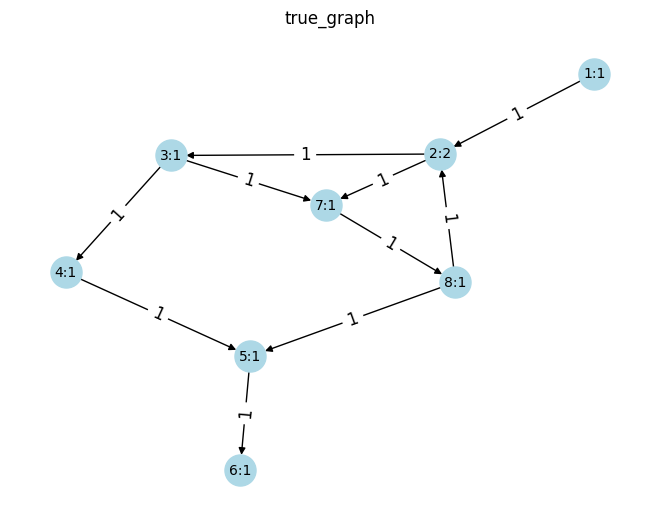

In [10]:
example, true_graph, dialogues = get_start_data(generated_24, 13)

In [11]:
true_graph.graph_dict

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'd like to learn about your NFT policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['Can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["Yes, let's discuss the partnership process."]},
  {'source': 4,
   'target': 5,
   'utterances': ["I'd like to proceed with the application."]},
  {'source': 5, 'target': 6, 'utterances': ["No, that's all. Thank you."]},
  {'source': 2,
   'target': 7,
   'utterances': ['Actually, can I change my inquiry?']},
  {'source': 7,
   'target': 8,
   'utterances': ["I'd like to learn about the partnership benefits instead."]},
  {'source': 8,
   'target': 5,
   'utterances': ["I'd like to proceed with the application."]},
  {'source': 8,
   'target': 2,
   'utterances': ['Actually, I have another question about policies.']},
  {'source': 3,
   'target': 7,
   'utterances': ['Actually, I want to change my question.']}],
 'nodes': [{'

Generation of the 1st graph

In [12]:
first_dialogue = Dialogue.from_list(dialogues[0]['messages'])
first_graph = graph_generator.invoke([first_dialogue])
validate_graph(first_graph)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
/cephfs/home/olshevskaya/chatsky-llm-autoconfig/dev_packages/chatsky_llm_autoconfig/chatsky_llm_autoconfig/algorithms/three_stages_1.py:80: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name=env_settings.EMBEDDER_MODEL, model_kwargs={"device": env_settings.EMBEDDER_DEVICE})
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policy', 'is_start': False, 'utterances': ['Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?']}, {'id': 3, 'label': 'modify_inquiry', 'is_start': False, 'utterances': ['Of course! How would you like to modify your inquiry?']}, {'id': 4, 'label': 'partnership_benefits', 'is_start': False, 'utterances': ['Certainly! Our partnerships offer various benefits including competitive compensation, exclusive access to our digital asset platforms, and opportunities for co-branded campaigns. We support our influencers with dedicated r

INFO:chromadb.telemetry.product.posthog:Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


RESULT:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policy', 'is_start': False, 'utterances': ['Certainly! Ou

True

In [ ]:
example['incremental']['graph_0'] = first_graph.graph_dict

In [19]:
with open("gen24_graphid13_incremental_o3-mini_TSG.json", "w", encoding="utf-8") as file:
    json.dump(example, file, indent=4, sort_keys=True)

In [12]:
# load the first graph as we already have it
with open("../data/gen24_graphid13_incremental_o3-mini_TSG.json", 'r', encoding="utf-8") as f:
    _ = json.load(f)
example['incremental']['graph_0'] = _['incremental']['graph_0']

#### **graph incrementation**

In [20]:
for i in range(len(dialogues)):
    if i == 0:
        result_graph = Graph(example['incremental']['graph_0'])
    else:
        new_dialogue = Dialogue.from_list(dialogues[i]['messages'])
        try:
            result_graph = graph_generator_llm.invoke([new_dialogue], result_graph)
            print(f'validate_graph {i}:', validate_graph(result_graph))
            example['incremental'][f'graph_{i}'] = result_graph.graph_dict
        except Exception as e:
            raise e

model:   o3-mini
LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


RES:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policy', 'is_start': False, 'utterances': ['Certainly! Our a

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


RES:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policy', 'is_start': False, 'utterances': ['Certainly! Our a

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


RES:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}, {'source': 5, 'target': 3, 'utterances': ['Actually, I want to change my question.']}, {'source': 4, 'target': 7, 'utterances': ["I'd like to proceed with the application."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! 

In [21]:
with open("gen24_graphid13_incremental_o3-mini_TSG.json", "w", encoding="utf-8") as file:
    json.dump(example, file, indent=4, sort_keys=True)

In [13]:
# load graphs as we already have them
with open("../data/gen24_graphid13_incremental_o3-mini_TSG.json", 'r', encoding="utf-8") as f:
    example = json.load(f)

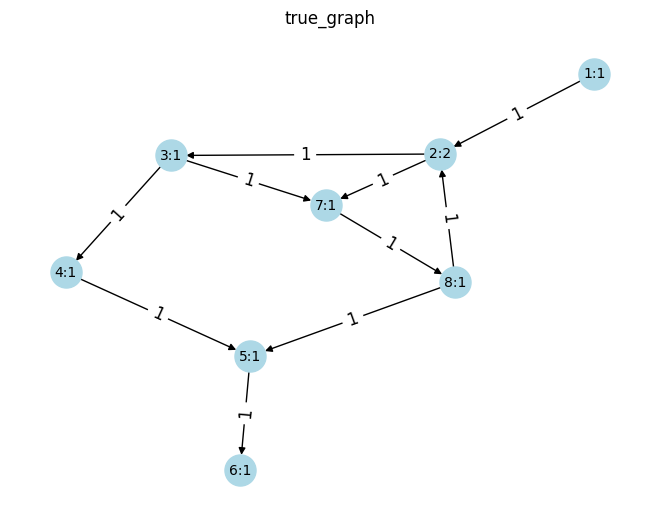

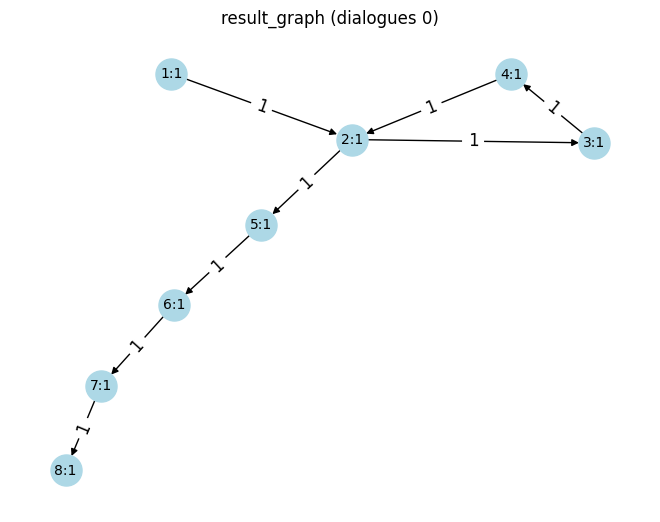

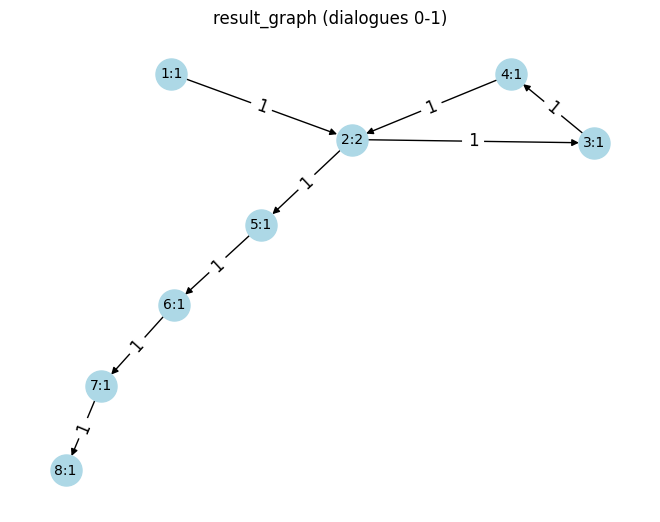

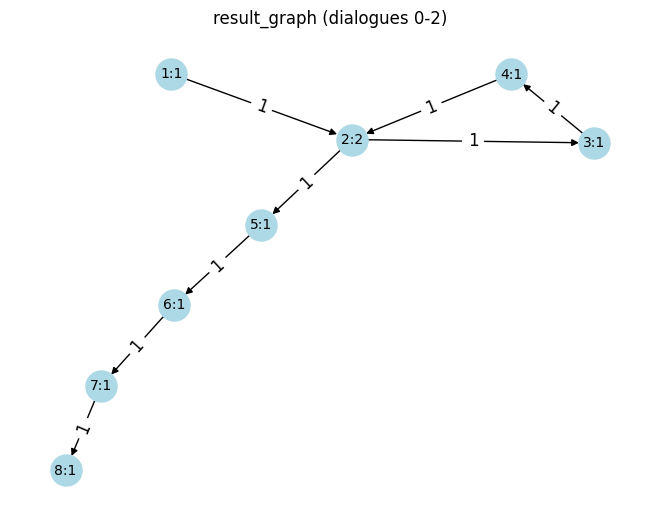

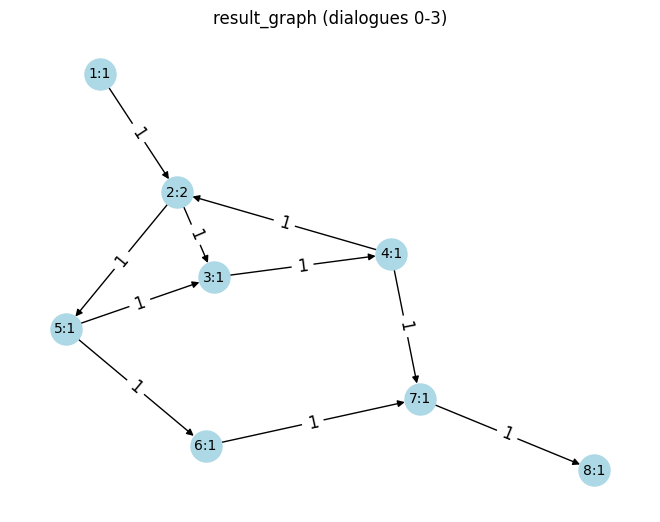

In [14]:
true_graph.visualise_short('true_graph')
for i, result_graph in enumerate(example['incremental'].values()):
    if i == 0:
        Graph(result_graph).visualise_short('result_graph (dialogues 0)')
    else:
        Graph(result_graph).visualise_short(f'result_graph (dialogues 0-{i})')

In [16]:
is_same_structure(true_graph, Graph(example['incremental']['graph_3']))

True

In [15]:
triplet_match_accuracy(true_graph, Graph(example['incremental']['graph_3']))

Graphs are isomorphic
(10, 10)
{1: ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?'], 2: ['Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?', 'Of course! Our NFT and digital asset policies ensure that all collaborations are transparent and ethical. We require influencers to clearly disclose any digital asset promotions and adhere to specific guidelines regarding content creation and distribution. Do you have any specific questions about these policies?'], 3: ['Certainly! For content creation, we require that any digital asset promotions clearly state the nature of the asset, its authenticity, and any associated benefits or risks. Additionally, all distribution channels must 

{'node_accuracy': 1.0, 'edge_accuracy': 0.2}

## o3-mini, ThreeStagesGenerator with embedder

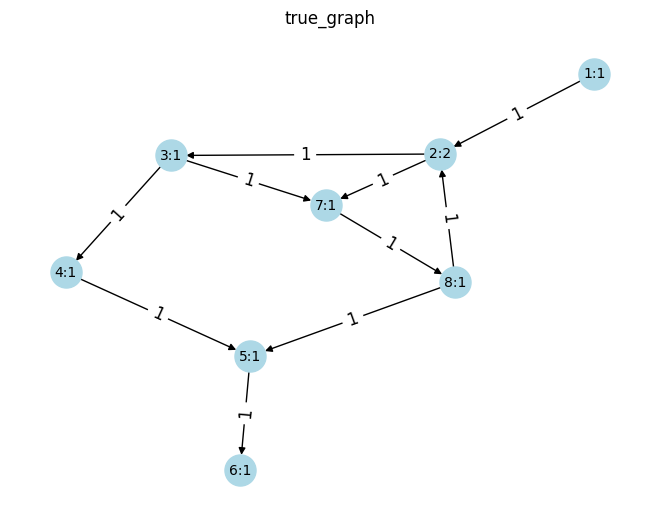

In [17]:
example, true_graph, dialogues = get_start_data(generated_24, 13)
with open("../data/gen24_graphid13_incremental_o3-mini_TSG.json", 'r', encoding="utf-8") as f:
    _ = json.load(f)
example['incremental']['graph_0'] = _['incremental']['graph_0'] 

#### **graph incrementation**

In [36]:
for i in range(len(dialogues)):
    if i == 0:
        result_graph = Graph(example['incremental']['graph_0'])
    else:
        new_dialogue = Dialogue.from_list(dialogues[i]['messages'])
        try:
            result_graph, _ = graph_generator_llm_emb.invoke([new_dialogue], result_graph)
            print(f'validate_graph {i}:', validate_graph(result_graph))
            example['incremental'][f'graph_{i}'] = result_graph.graph_dict
        except Exception as e:
            raise e

model:   o3-mini
LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policy', 'is_start': False, 'utterances': ['Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?', 'Of course! Our NFT and digital asset policies ensure that all collaborations are transparent and ethical. We require influencers to clearly disclose any digital asset promotions and adhere to specific guidelines regarding content creation and distribution. Do you have any specific questions about these policies?']}, {'id': 3, 'label': 'modify_inquiry', 'is_start': False, 'utterances': ['Of course! How would you like to modify yo

RESULT:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policy', 'is_start': False, 'utterances': ['Certainly! Ou

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policy', 'is_start': False, 'utterances': ['Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?', 'Of course! Our NFT and digital asset policies ensure that all collaborations are transparent and ethical. We require influencers to clearly disclose any digital asset promotions and adhere to specific guidelines regarding content creation and distribution. Do you have any specific questions about these policies?']}, {'id': 3, 'label': 'modify_inquiry', 'is_start': False, 'utterances': ['Of course! How would you like to modify yo

RESULT:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policy', 'is_start': False, 'utterances': ['Certainly! Ou

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Failed to parse DialogueNodes from completion {"graph": {"edges": [{"source": 1, "target": 2, "utterances": ["i'd like to learn about your nft policies."]}, {"source": 2, "target": 5, "utterances": ["can you provide more details on content guidelines?"]}, {"source": 2, "target": 3, "utterances": ["actually, can i change my inquiry?"]}, {"source": 3, "target": 4, "utterances": ["i'd like to learn about the partnership benefits instead."]}, {"source": 4, "target": 2, "utterances": ["actually, i have another question about policies."]}, {"source": 5, "target": 6, "utterances": ["yes, let's discuss the partnership process."]}, {"source": 6, "target": 7, "utterances": ["i'd like to proceed with the application."]}, {"source": 7, "target": 8, "utterances": ["no, that's all. thank you."]}], "nodes": [{"id": 1, "label": "start", "is_start": true, "utterances": ["Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?"]}, {"id": 2, "label": "nft_policy", "

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Failed to parse DialogueNodes from completion {"graph": {"edges": [{"source": 1, "target": 2, "utterances": ["i'd like to learn about your nft policies."]}, {"source": 2, "target": 5, "utterances": ["can you provide more details on content guidelines?"]}, {"source": 2, "target": 3, "utterances": ["actually, can i change my inquiry?"]}, {"source": 3, "target": 4, "utterances": ["i'd like to learn about the partnership benefits instead."]}, {"source": 4, "target": 2, "utterances": ["actually, i have another question about policies."]}, {"source": 5, "target": 6, "utterances": ["yes, let's discuss the partnership process."]}, {"source": 6, "target": 7, "utterances": ["i'd like to proceed with the application."]}, {"source": 7, "target": 8, "utterances": ["no, that's all. thank you."]}, {"source": 5, "target": 3, "utterances": ["Actually, I want to change my question."]}, {"source": 4, "target": 7, "utterances": ["I'd like to proceed with the application."]}], "nodes": [{"id": 1, "label": 

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policy', 'is_start': False, 'utterances': ['Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?', 'Of course! Our NFT and digital asset policies ensure that all collaborations are transparent and ethical. We require influencers to clearly disclose any digital asset promotions and adhere to specific guidelines regarding content creation and distribution. Do you have any specific questions about these policies?']}, {'id': 3, 'label': 'modify_inquiry', 'is_start': False, 'utterances': ['Of course! How would you like to modify yo

RESULT:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 5, 'target': 3, 'utterances': ['actually, i want to change my question.']}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hell

In [37]:
with open("gen24_graphid13_incremental_o3-mini_TSG_emb.json", "w", encoding="utf-8") as file:
    json.dump(example, file, indent=4, sort_keys=True)

In [18]:
with open("../data/gen24_graphid13_incremental_o3-mini_TSG_emb.json", 'r', encoding="utf-8") as f:
    example = json.load(f)

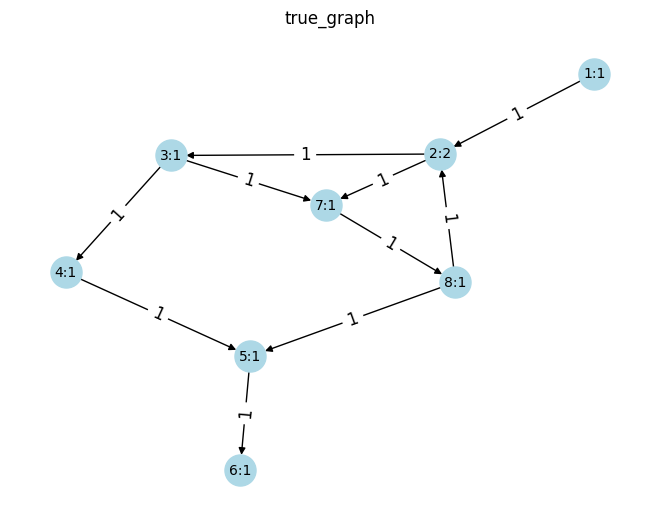

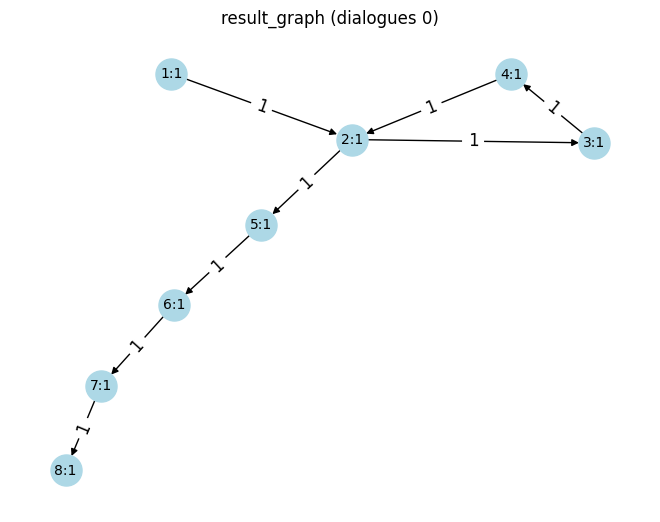

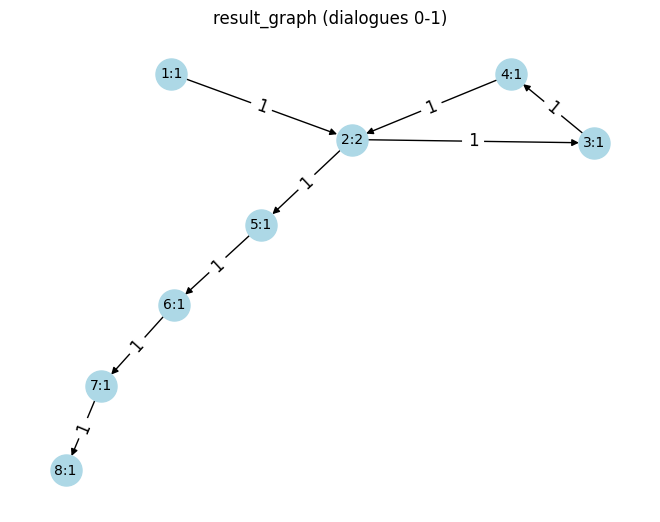

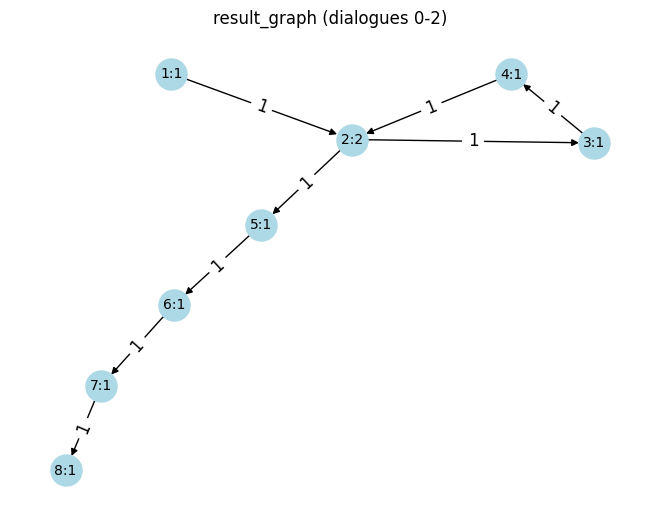

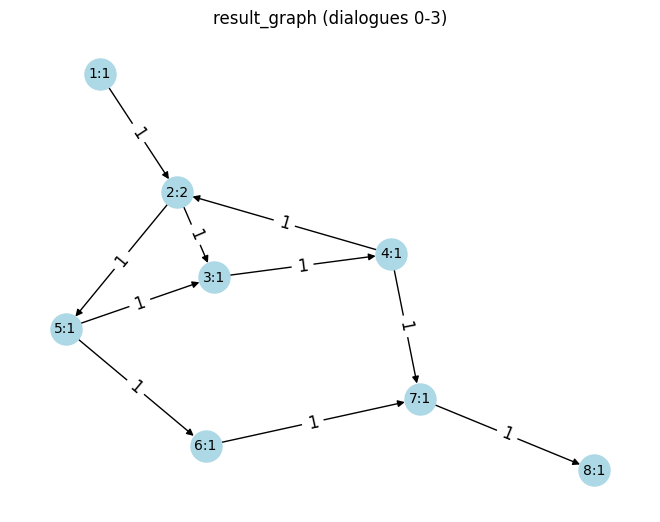

In [19]:
true_graph.visualise_short('true_graph')
for i, result_graph in enumerate(example['incremental'].values()):
    if i == 0:
        Graph(result_graph).visualise_short('result_graph (dialogues 0)')
    else:
        Graph(result_graph).visualise_short(f'result_graph (dialogues 0-{i})')

In [20]:
is_same_structure(true_graph, Graph(example['incremental']['graph_3']))

True

In [21]:
triplet_match_accuracy(true_graph, Graph(example['incremental']['graph_3']))

Graphs are isomorphic
(10, 10)
{1: ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?'], 2: ['Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?', 'Of course! Our NFT and digital asset policies ensure that all collaborations are transparent and ethical. We require influencers to clearly disclose any digital asset promotions and adhere to specific guidelines regarding content creation and distribution. Do you have any specific questions about these policies?'], 3: ['Certainly! For content creation, we require that any digital asset promotions clearly state the nature of the asset, its authenticity, and any associated benefits or risks. Additionally, all distribution channels must 

{'node_accuracy': 1.0, 'edge_accuracy': 0.0}

## o3-mini, AppendChain

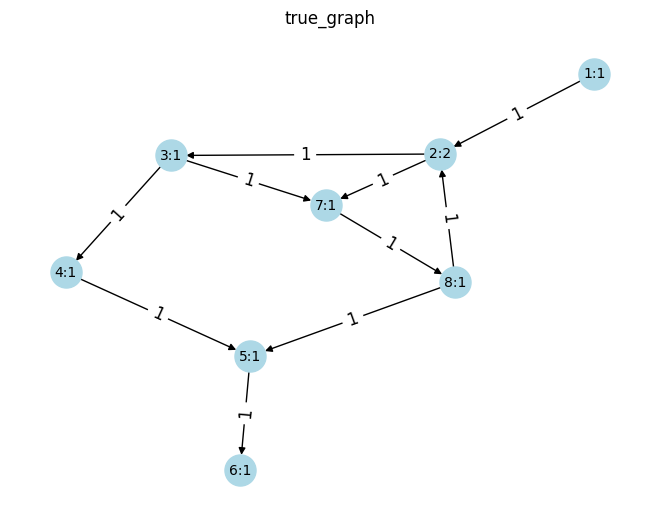

In [22]:
example, true_graph, dialogues = get_start_data(generated_24, 13)
with open("../data/gen24_graphid13_incremental_o3-mini_TSG.json", 'r', encoding="utf-8") as f:
    _ = json.load(f)
example['incremental']['graph_0'] = _['incremental']['graph_0'] 

#### **graph incrementation**

In [49]:
for i in range(len(dialogues)):
    if i == 0:
        result_graph = Graph(example['incremental']['graph_0'])
    else:
        new_dialogue = Dialogue.from_list(dialogues[i]['messages'])
        try:
            result_graph = graph_generator_llm_2.invoke(dialogues[(i-1):(i+1)], result_graph)
            print(f'validate_graph {i}:', validate_graph(result_graph))
            example['incremental'][f'graph_{i}'] = result_graph.graph_dict
        except Exception as e:
            raise e

model:   o3-mini
LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


validate_graph 1: True
model:   o3-mini
LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


validate_graph 2: True
model:   o3-mini
LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


validate_graph 3: True


In [ ]:
with open("../data/gen24_graphid13_incremental_o3-mini_AppCh.json", "w", encoding="utf-8") as file:
    json.dump(example, file, indent=4, sort_keys=True)

In [23]:
with open("../data/gen24_graphid13_incremental_o3-mini_AppCh.json", 'r', encoding="utf-8") as f:
    example = json.load(f)

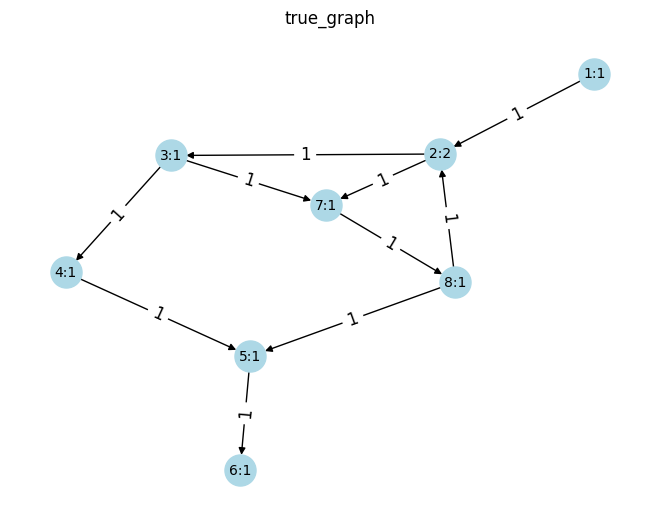

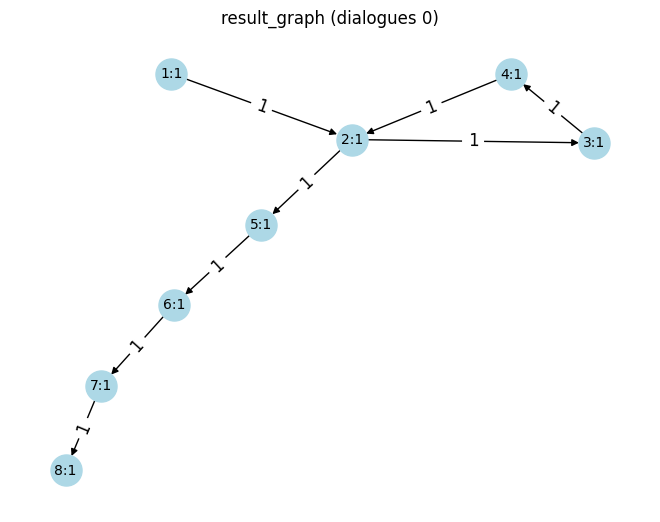

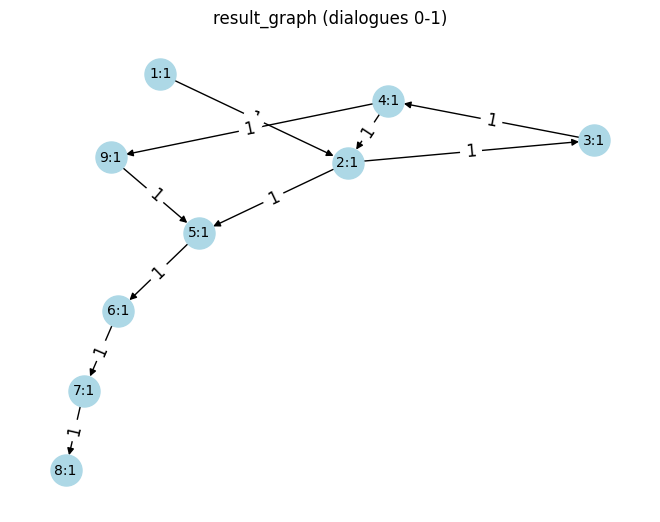

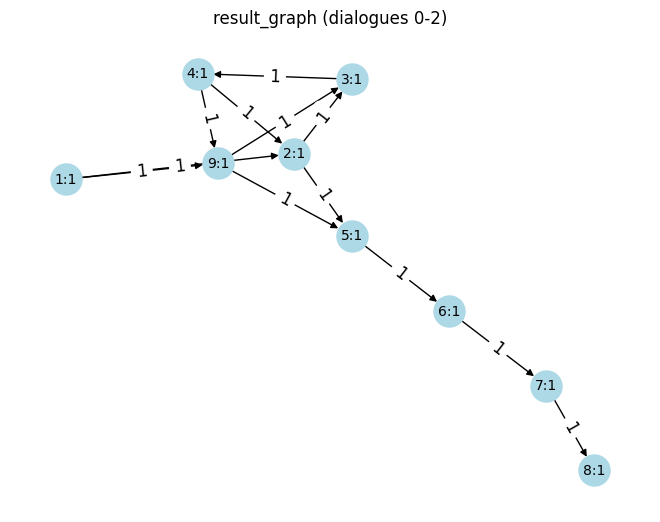

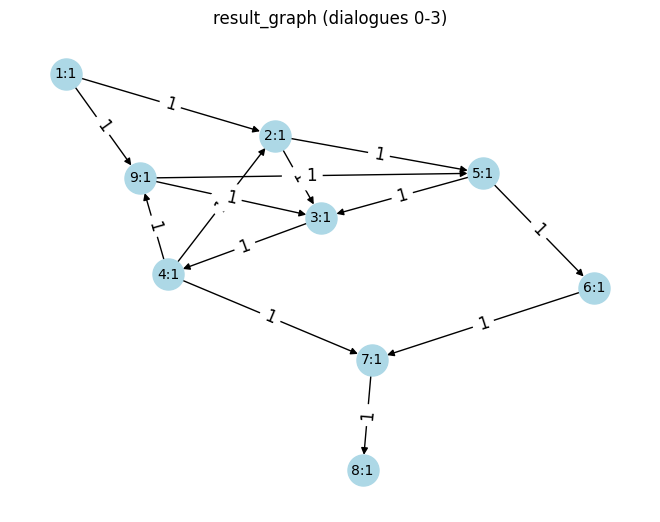

In [24]:
true_graph.visualise_short('true_graph')
for i, result_graph in enumerate(example['incremental'].values()):
    if i == 0:
        Graph(result_graph).visualise_short('result_graph (dialogues 0)')
    else:
        Graph(result_graph).visualise_short(f'result_graph (dialogues 0-{i})')

In [25]:
is_same_structure(true_graph, Graph(example['incremental']['graph_3']))

False

In [26]:
triplet_match_accuracy(true_graph, Graph(example['incremental']['graph_3']))

(10, 14)
{1: ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?'], 2: ['Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?', 'Of course! Our NFT and digital asset policies ensure that all collaborations are transparent and ethical. We require influencers to clearly disclose any digital asset promotions and adhere to specific guidelines regarding content creation and distribution. Do you have any specific questions about these policies?'], 3: ['Certainly! For content creation, we require that any digital asset promotions clearly state the nature of the asset, its authenticity, and any associated benefits or risks. Additionally, all distribution channels must comply with relevant r

{'node_accuracy': 0.0, 'edge_accuracy': 0.0}